In [655]:
import numpy as np
import neurokit2 as nk
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, correlate
from scipy.stats import skew, kurtosis, mode

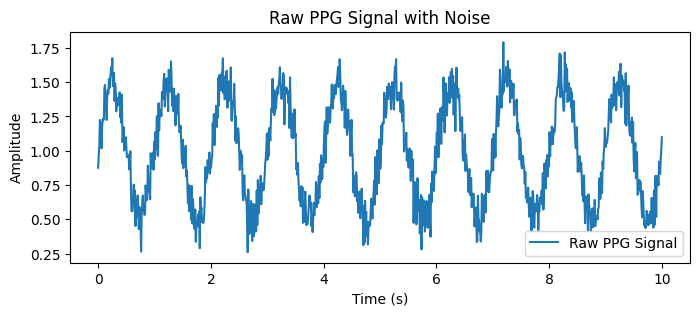

In [656]:
# Generate the PPG Signal with Noise
# Generate a 10-second synthetic PPG signal with sinusoidal behavior and random noise.
fs = 100  # Sampling frequency (Hz)
t = np.linspace(0, 10, fs * 10)  # Time vector for 10 seconds
ppg_signal = 1 + 0.5 * np.sin(2 * np.pi * 1 * t) + 0.1 * np.random.randn(len(t))  # PPG signal with noise

# Plot the raw PPG signal
plt.figure(figsize=(8, 3))
plt.plot(t, ppg_signal, label="Raw PPG Signal")
plt.title("Raw PPG Signal with Noise")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

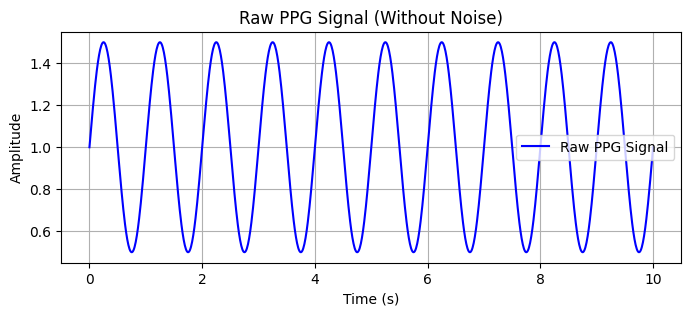

In [657]:
# Clean PPG signal (without noise)
ppg_signal_clean = 1 + 0.5 * np.sin(2 * np.pi * 1 * t)  # PPG signal without noise

# Plot the clean PPG signal
plt.figure(figsize=(8, 3))
plt.plot(t, ppg_signal_clean, label="Raw PPG Signal", color='blue')
plt.title("Raw PPG Signal (Without Noise)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()

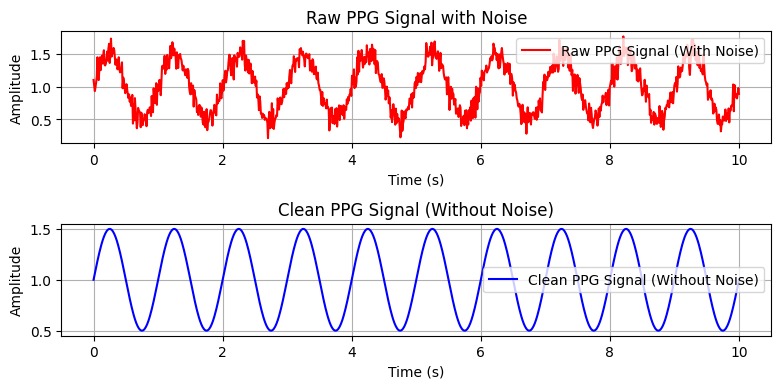

In [658]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the PPG Signal with Noise
fs = 100  # Sampling frequency (Hz)
t = np.linspace(0, 10, fs * 10)  # Time vector for 10 seconds
ppg_signal = 1 + 0.5 * np.sin(2 * np.pi * 1 * t) + 0.1 * np.random.randn(len(t))  # PPG signal with noise

# Generate Clean PPG Signal (Without Noise)
ppg_signal_clean = 1 + 0.5 * np.sin(2 * np.pi * 1 * t)  # Clean PPG signal

# Create a figure with two subplots
plt.figure(figsize=(8, 4))

# First subplot: Raw PPG Signal (With Noise)
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(t, ppg_signal, label="Raw PPG Signal (With Noise)", color='red')
plt.title("Raw PPG Signal with Noise")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

# Second subplot: Clean PPG Signal (Without Noise)
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.plot(t, ppg_signal_clean, label="Clean PPG Signal (Without Noise)", color='blue')
plt.title("Clean PPG Signal (Without Noise)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the figure
plt.show()


Noise-Reduced Signal Using Bandpass Filter

C:\Users\User\AppData\Local\Temp\ipykernel_14416\2473039617.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


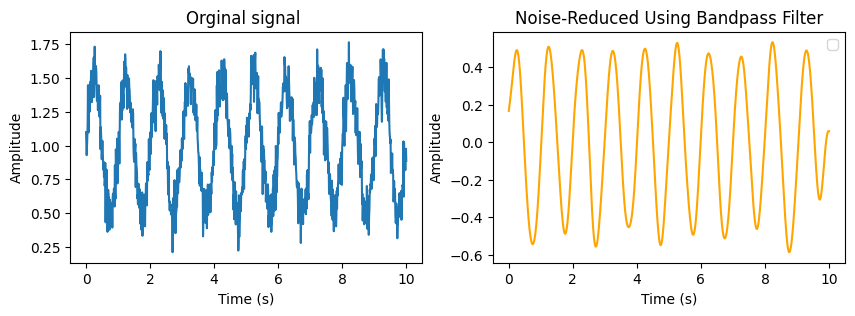

In [659]:
from scipy.signal import butter, filtfilt

# Define bandpass filter
low_cutoff = 0.5  # Lower cutoff frequency (Hz)
high_cutoff = 3.0  # Upper cutoff frequency (Hz)
b, a = butter(4, [low_cutoff / (fs / 2), high_cutoff / (fs / 2)], btype='band')

# Apply the filter to the signal
filtered_signal = filtfilt(b, a, ppg_signal)

# Plot the filtered signal
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.plot(t, ppg_signal)
plt.title("Orginal signal ")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(122)
plt.plot(t, filtered_signal, color="orange")
plt.title("Noise-Reduced Using Bandpass Filter")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


Noise-Reduced Signal Using Low-pass Filter

C:\Users\User\AppData\Local\Temp\ipykernel_14416\77108925.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


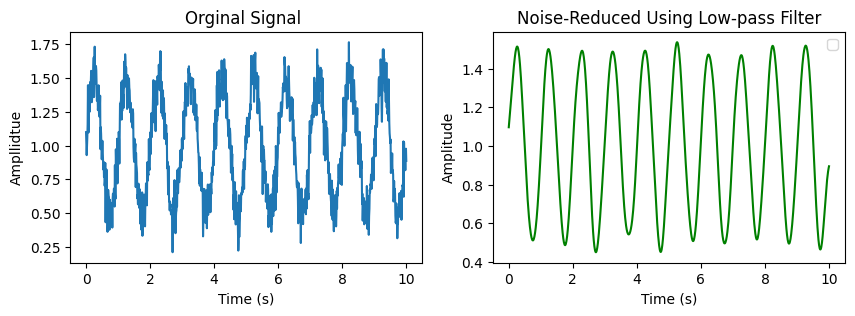

In [660]:
# Define low-pass filter
cutoff = 3.0  # Cutoff frequency (Hz)
b, a = butter(4, cutoff / (fs / 2), btype='low')

# Apply the filter to the signal
low_passed_signal = filtfilt(b, a, ppg_signal)

# Plot the low-pass filtered signal
plt.figure(figsize=(10, 3))
plt.subplot(121)
plt.plot(t, ppg_signal)
plt.title("Orginal Signal ")
plt.xlabel("Time (s)")
plt.ylabel("Ampllidtue")

plt.subplot(122)
plt.plot(t, low_passed_signal, color="green")
plt.title("Noise-Reduced Using Low-pass Filter")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


Normalized Signal


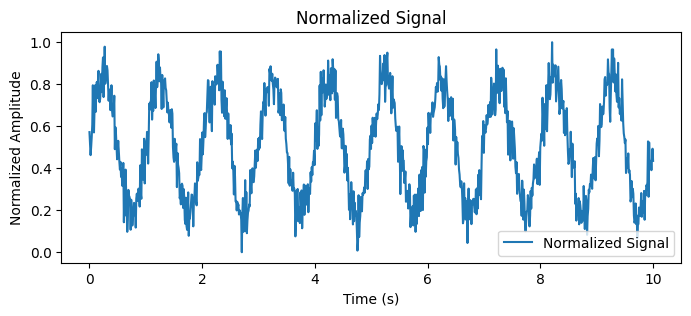

In [661]:

# Normalize the PPG signal between 0 and 1.
normalized_signal = (ppg_signal - np.min(ppg_signal)) / (np.max(ppg_signal) - np.min(ppg_signal))  # Normalization

# Plot the normalized signal
plt.figure(figsize=(8, 3))
plt.plot(t, normalized_signal, label="Normalized Signal")
plt.title("Normalized Signal")
plt.xlabel("Time (s)")
plt.ylabel("Normalized Amplitude")
plt.legend()
plt.show()

Detect peak

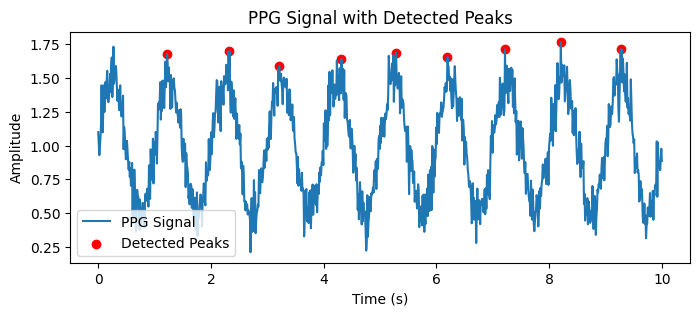

In [662]:

# Detect peaks in the PPG signal using NeuroKit2.
peaks_info = nk.ppg_findpeaks(ppg_signal, sampling_rate=fs)  # Returns a dictionary
peaks = peaks_info["PPG_Peaks"]  # Extract the peaks

# Plot the PPG signal with detected peaks
plt.figure(figsize=(8, 3))
plt.plot(t, ppg_signal, label="PPG Signal")
plt.scatter(t[peaks], ppg_signal[peaks], color='red', label="Detected Peaks")
plt.title("PPG Signal with Detected Peaks")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


Valid peak

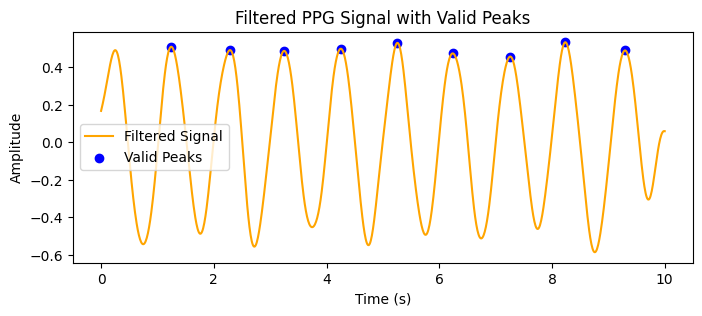

In [663]:
# Detect peaks using nk.ppg_findpeaks
peaks = nk.ppg_findpeaks(filtered_signal, sampling_rate=fs)["PPG_Peaks"]

# Filter valid peaks based on amplitude thresholds
valid_peaks = peaks[(filtered_signal[peaks] > 0.2) & (filtered_signal[peaks] < 1.8)]  # Valid peaks

# Plot the filtered signal with valid peaks
plt.figure(figsize=(8, 3))
plt.plot(t, filtered_signal, label="Filtered Signal", color='orange')
plt.scatter(t[valid_peaks], filtered_signal[valid_peaks], color='blue', label="Valid Peaks")
plt.title("Filtered PPG Signal with Valid Peaks")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()


Abnormal Peak

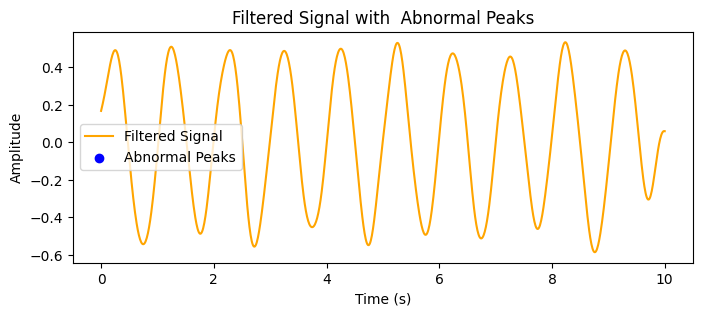

In [664]:
# Detect irregular peak intervals
inter_peak_intervals = np.diff(valid_peaks) / fs  # Intervals in seconds
mean_ibi = np.mean(inter_peak_intervals)
std_ibi = np.std(inter_peak_intervals)

# Define thresholds for abnormal intervals (e.g., mean ± 2*std)
lower_threshold = mean_ibi - 2 * std_ibi
upper_threshold = mean_ibi + 2 * std_ibi
abnormal_intervals = (inter_peak_intervals < lower_threshold) | (inter_peak_intervals > upper_threshold)

# Find indices of abnormal intervals
abnormal_peaks = valid_peaks[1:][abnormal_intervals]

# Plot detected abnormalities on the filtered signal
plt.figure(figsize=(8, 3))

plt.plot(t, filtered_signal, label="Filtered Signal", color='orange')
# plt.scatter(t[valid_peaks], filtered_signal[valid_peaks], color='green', label="Valid Peaks")
plt.scatter(t[abnormal_peaks], filtered_signal[abnormal_peaks], color='blue', label="Abnormal Peaks")
plt.title("Filtered Signal with  Abnormal Peaks")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

Feature Extraction Results:
Mean Interval (s): 1.00625
Standard Deviation of Intervals (s): 0.03276335605520292
Skewness of Intervals: 0.37685887707133703
Kurtosis of Intervals: -1.093508260076407
Abnormality Percentage (%): 0.0
Dominant Frequency (Hz): 1.0


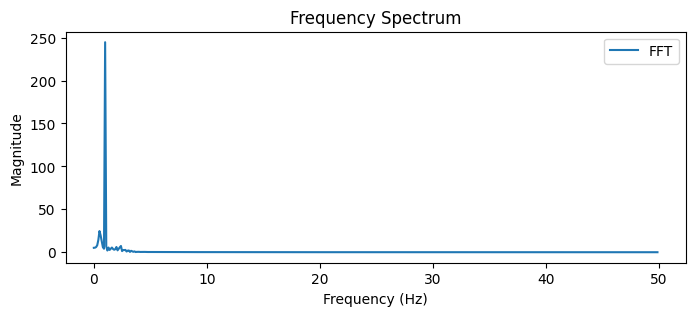

In [665]:


# Feature 1: Statistical features of inter-peak intervals
mean_interval = np.mean(inter_peak_intervals)
std_interval = np.std(inter_peak_intervals)
skewness_interval = skew(inter_peak_intervals)
kurtosis_interval = kurtosis(inter_peak_intervals)

# Feature 2: Abnormality percentage
abnormality_percentage = len(abnormal_peaks) / len(valid_peaks) * 100

# Feature 3: FFT-based frequency domain analysis
fft_signal = np.fft.fft(filtered_signal)
frequencies = np.fft.fftfreq(len(filtered_signal), 1 / fs)
dominant_frequency = frequencies[np.argmax(np.abs(fft_signal[:len(fft_signal) // 2]))]

# Print extracted features
print("Feature Extraction Results:")
print(f"Mean Interval (s): {mean_interval}")
print(f"Standard Deviation of Intervals (s): {std_interval}")
print(f"Skewness of Intervals: {skewness_interval}")
print(f"Kurtosis of Intervals: {kurtosis_interval}")
print(f"Abnormality Percentage (%): {abnormality_percentage}")
print(f"Dominant Frequency (Hz): {dominant_frequency}")

# Plot frequency domain representation
plt.figure(figsize=(8, 3))
plt.plot(frequencies[:len(frequencies) // 2], np.abs(fft_signal[:len(fft_signal) // 2]), label="FFT")
plt.title("Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.show()


In [666]:

# Estimate heart rate and respiratory rate from valid peaks.
heart_rate = 60 / np.mean(np.diff(valid_peaks) / fs)  # Calculate heart rate (BPM)
respiratory_rate = heart_rate / 4  # Approximate respiratory rate assuming 4:1 HR:RR ratio

# Print heart rate and respiratory rate
print(f"Heart Rate (BPM): {heart_rate}")
print(f"Respiratory Rate (breaths per minute): {respiratory_rate})")

Heart Rate (BPM): 59.627329192546576
Respiratory Rate (breaths per minute): 14.906832298136644)


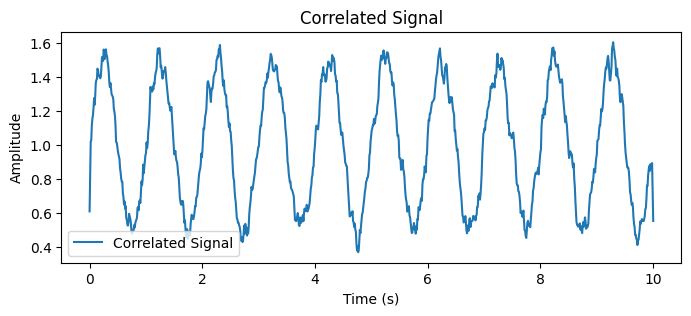

In [667]:

# Perform correlation using the kernel on the PPG signal.
kernel = np.ones(5) / 5  # Smoothing kernel

correlated_signal = np.correlate(ppg_signal, kernel, mode='same')  # Correlation

# Plot the correlated signal
plt.figure(figsize=(8, 3))
plt.plot(t, correlated_signal, label="Correlated Signal")
plt.title("Correlated Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

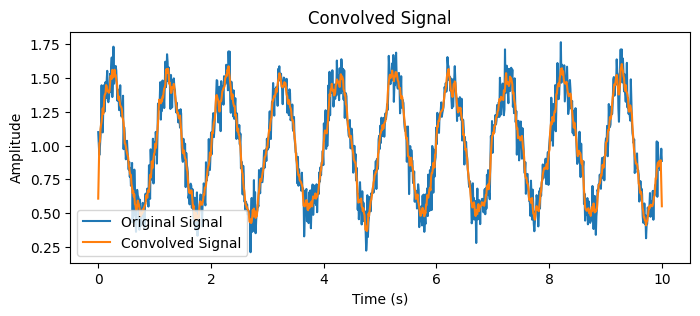

In [668]:

# Perform convolution on the PPG signal using a smoothing kernel.

convolved_signal = np.convolve(ppg_signal, kernel, mode='same')  # Convolution

# Plot the convolved signal
plt.figure(figsize=(8, 3))
plt.plot(t, ppg_signal, label="Original Signal")
plt.plot(t, convolved_signal, label="Convolved Signal")
plt.title("Convolved Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

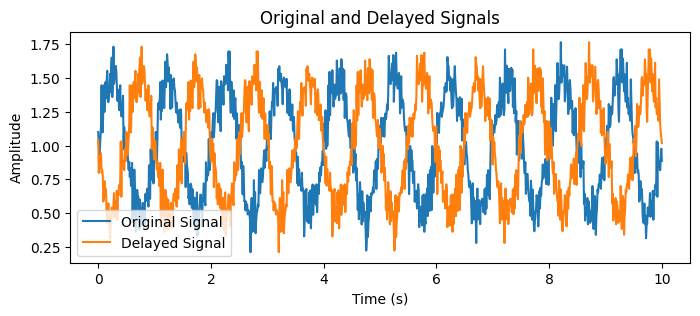

In [669]:

# Create a delayed version of the signal by shifting it by 50 samples.
delay = 50  # Delay in samples
delayed_signal = np.roll(ppg_signal, delay)  # Shifted signal

# Plot the original and delayed signals
plt.figure(figsize=(8, 3))
plt.plot(t, ppg_signal, label="Original Signal")
plt.plot(t, delayed_signal, label="Delayed Signal")
plt.title("Original and Delayed Signals")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

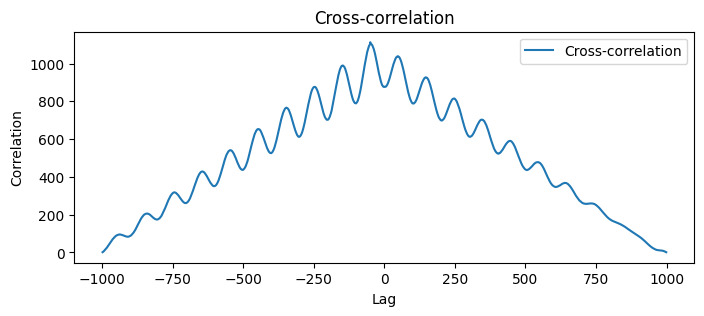

In [670]:

# Compute the cross-correlation between the original and delayed signals.
cross_corr = correlate(ppg_signal, delayed_signal, mode='full')  # Cross-correlation
lags = np.arange(-len(ppg_signal) + 1, len(ppg_signal))  # Lags for correlation

# Plot the cross-correlation
plt.figure(figsize=(8, 3))
plt.plot(lags, cross_corr, label="Cross-correlation")
plt.title("Cross-correlation")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.legend()
plt.show()


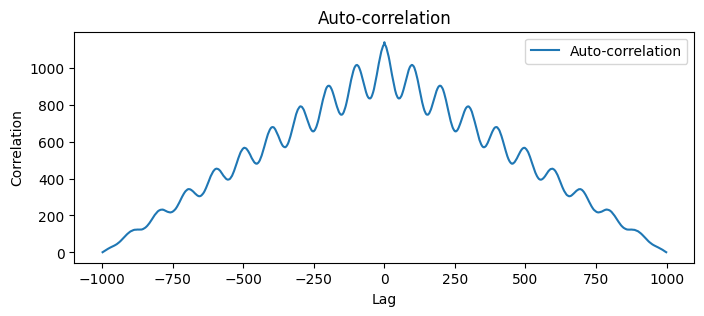

In [671]:
#  Auto-correlation
# Compute the auto-correlation of the PPG signal.
auto_corr = correlate(ppg_signal, ppg_signal, mode='full')  # Auto-correlation
lags = np.arange(-len(ppg_signal) + 1, len(ppg_signal))  # Lags for correlation

# Plot the auto-correlation
plt.figure(figsize=(8, 3))
plt.plot(lags, auto_corr, label="Auto-correlation")
plt.title("Auto-correlation")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.legend()
plt.show()

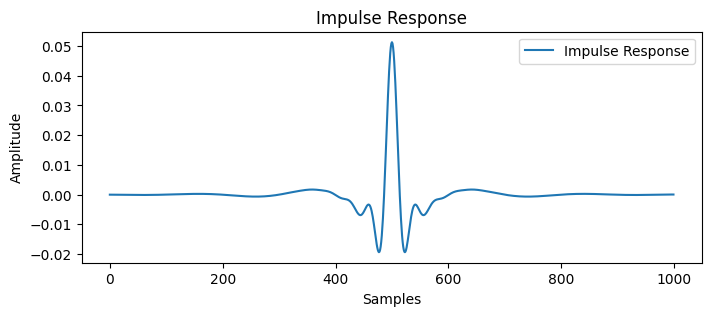

In [672]:

# Design a bandpass filter and compute its impulse response.
impulse = np.zeros_like(ppg_signal)  # Create an impulse signal
impulse[len(impulse) // 2] = 1  # Set the center to 1
b, a = butter(4, [0.5 / (fs / 2), 3.0 / (fs / 2)], btype='band')  # Bandpass filter design
impulse_response = filtfilt(b, a, impulse)  # Compute impulse response

# Plot the impulse response
plt.figure(figsize=(8, 3))
plt.plot(impulse_response, label="Impulse Response")
plt.title("Impulse Response")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

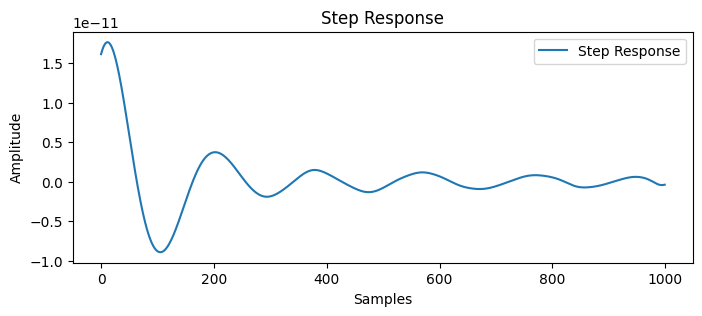

In [673]:

# Step Response
# Compute the step response of the bandpass filter.
step = np.ones_like(ppg_signal)  # Create a step signal
step_response = filtfilt(b, a, step)  # Compute step response

# Plot the step response
plt.figure(figsize=(8, 3))
plt.plot(step_response, label="Step Response")
plt.title("Step Response")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

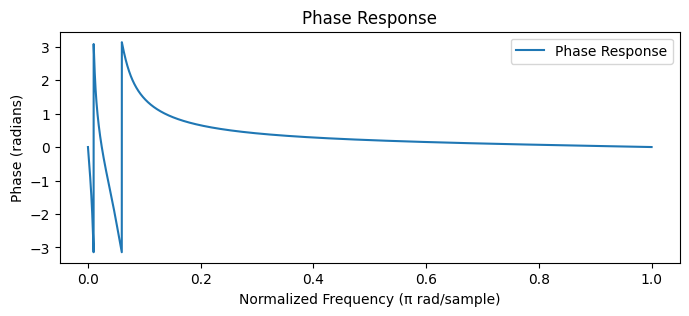

In [674]:
# Phase Response
# Compute and plot the phase response of the filter.
from scipy.signal import freqz
w, h = freqz(b, a, worN=8000)  # Frequency response
plt.figure(figsize=(8, 3))
plt.plot(w / np.pi, np.angle(h), label="Phase Response")
plt.title("Phase Response")
plt.xlabel("Normalized Frequency (π rad/sample)")
plt.ylabel("Phase (radians)")
plt.legend()
plt.show()

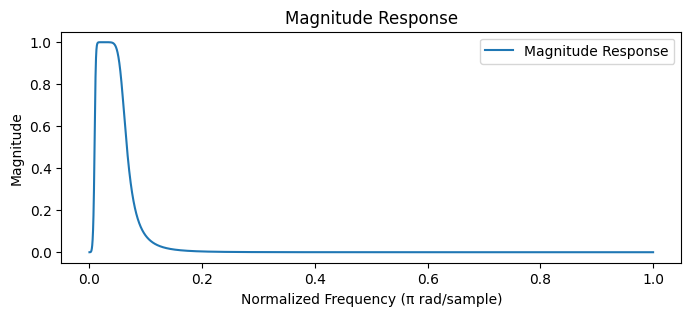

In [675]:
# Magnitude Response
# Compute and plot the magnitude response of the filter.
plt.figure(figsize=(8, 3))
plt.plot(w / np.pi, np.abs(h), label="Magnitude Response")
plt.title("Magnitude Response")
plt.xlabel("Normalized Frequency (π rad/sample)")
plt.ylabel("Magnitude")
plt.legend()
plt.show()

Signal Quality Index (SQI):

In [676]:
sqi = np.var(filtered_signal) / np.var(ppg_signal - filtered_signal)
print(f"Signal Quality Index (SQI): {sqi}")


Signal Quality Index (SQI): 9.391240626289482


 Heart Rate Variability (HRV):

In [677]:
rr_intervals = np.diff(valid_peaks) / fs  # RR intervals in seconds
hrv_mean = np.mean(rr_intervals)
hrv_sdnn = np.std(rr_intervals)  # Standard deviation of RR intervals
print(f"HRV Mean: {hrv_mean} seconds")
print(f"HRV SDNN: {hrv_sdnn} seconds")


HRV Mean: 1.00625 seconds
HRV SDNN: 0.03276335605520292 seconds


Energy of the Signal

In [678]:
signal_energy = np.sum(filtered_signal**2)
print(f"Signal Energy: {signal_energy}")


Signal Energy: 123.49801315077309


 Beat-to-Beat Analysis:

In [679]:
peak_amplitudes = filtered_signal[valid_peaks]
print(f"Peak Amplitudes: {peak_amplitudes}")
print(f"Average Peak Amplitude: {np.mean(peak_amplitudes)}")


Peak Amplitudes: [0.50930876 0.49135353 0.4869328  0.49876336 0.5298567  0.47388851
 0.45695944 0.53348702 0.48947142]
Average Peak Amplitude: 0.49666906198191796


8. Adaptive Filtering:
Use adaptive filters to dynamically reduce noise or baseline wander.

9. Poincaré Plot:
Visualize the RR intervals in a scatter plot to study HRV pattern

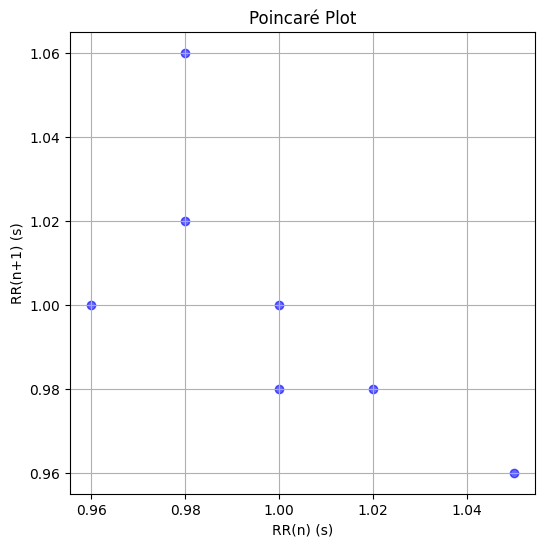

: 

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(rr_intervals[:-1], rr_intervals[1:], color='blue', alpha=0.6)
plt.title("Poincaré Plot")
plt.xlabel("RR(n) (s)")
plt.ylabel("RR(n+1) (s)")
plt.grid()
plt.show()
